Binary Classification using Logistic Regression
                 
 <p align>A linear classifier is a model used to make a classification decision based on the value of a linear combination of the characteristics.Logistic regression is one of the popular method used for classification algorithms and Logistic Regression is a statistical method for analyzing dataset in which there are one or more independent variables that determine the output. The outcome is the measure with a binary(0 and 1) dependent variable in case of binary classification.</p>

                 

In [92]:
#import the libraries necessary for our algorithm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score,cross_val_predict
from sklearn import metrics,cross_validation
from sklearn.linear_model import LogisticRegression
from numpy import where
from pylab import scatter, show, legend, xlabel, ylabel
%matplotlib inline


Here we will import the dataset and select the first two columns, which are the two features that we are using. We then normalize the data.

In [93]:
# Load the dataset
df=pd.read_csv("/home/sathyanarayanan/Downloads/pima.csv")

In [94]:
#Extracting only two features from the dataset
Xraw=df.iloc[:,[1,2]]

In [95]:
#normalize the dataset for rescaling all the columns to the range 0-1
X = sklearn.preprocessing.normalize(Xraw)


We are creating few arrays here which will hold the values

In [96]:
#Assigning the Class variable in Y and declaring few variables necessary for implementation
Y=df.iloc[:,8].values
sigm=[]
accuracy_matrix=[]
coeff=[]


We are making 5 fold cross validation of data sets here

In [97]:
#Using kFold implementation

kf = KFold(n_splits=5)
kf.get_n_splits(X)
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


<p align> Here we are implementing our algorithm of predicting the response based on two features. Initially, we split the dataset into train and test set. We train our model using train dataset and then predict using test dataset.</p>
<p align>The equation for logistic regression is :y = sigma(w^T * x) = 1/(1+exp(-w^T x)), where w refers to the parameters, X refers refers to the features. Since there is no closed form solution for w, you will need to use gradient descent or an alternative optimization approach to solve for the parameters.We use schoastic gradient descent to find the coefficients for the logistic regression model. Hence we use the below linear equations in our implementation. We also find the prediction using the following formula:
    prediction=1/(1+exp(-w^T x))
    b0 = b0 + alpha * (y – prediction) * prediction * (1 – prediction) * 1
    b1 = b0 + alpha * (y – prediction) * prediction * (1 – prediction) * x1
    b2 = b0 + alpha * (y – prediction) * prediction * (1 – prediction) * x2 </p>
<p align> We also calculate the sigmoid values, and then find accuracy of our predicted output.</p>


In [98]:
#Our Algorithm
def lr():
    #Splitting the dataset in each fold into training and testing set
    X_train, X_test, y_train, y_test = X[train], X[test], Y[train], Y[test]
    #initialising coefficients, alpha and epoch
    b0=0
    b1=0
    b2=0
    alpha=0.3
    epoch=1000
    #running the loop for each row epoch times
    for i in range(epoch):
        for j in range(len(X_train)):
            #calculating prediction and updating coefficient values
            prediction=1 / (1 + np.exp(-(b0 + b1*X_train[j][0] + b2*X_train[j][1])))
            b0 = b0 + alpha * (y_train[j]-prediction) * prediction * (1.0- prediction) * 1.0
            b1= b1 + alpha * (y_train[j]-prediction) * prediction * (1.0- prediction) * X_train[j][0]
            b2 = b2 + alpha * (y_train[j]-prediction) * prediction * (1.0- prediction) * X_train[j][1]         
    coeff.append(b0)
    coeff.append(b1)
    coeff.append(b2)
    #predicting based on test data
    
    for i in range(len(X_test)):
        output=coeff[0]+coeff[1]*X_test[i][0]+coeff[2]*X_test[i][1]
        sig=1.0/(1.0+np.exp(-output))
        sigm.append(sig)
    for i in range(len(sigm)):
        if sigm[i]<=0.5:
            sigm[i]=0
        else:
            sigm[i]=1
    y_pred=np.array(sigm)
    #calculating accuracy
    correct = 0
    for i in range(len(y_test)):
        if y_test[i] == y_pred[i]:
            correct += 1
    accuracy=correct / float(len(y_test)) * 100.0
    accuracy_matrix.append(accuracy)
    

    
    return accuracy_matrix,y_pred,X_test

Here we are splitting dataset to train and test and calling the logistic regression function

In [99]:
#running for 5-folds
for train,test in kf.split(X):
    my_accuracy_matrix,my_y_pred,my_X_test=lr()


We are printing the maximum accuracy out of the 5

In [100]:
#we are taking maximum accuracy
print(max(my_accuracy_matrix))

66.88311688311688


In [101]:
final_ypred=my_y_pred[0:153]

<p align> This is about plotting the graph. We use the predicted values and plot the graph for the two features which we are using. Our graph is not very accurate. Both the classes are overlapping. We think that this is because of the dataset itself. We tried plotting the graph in scikit implementation also. We got the same plot. </p>

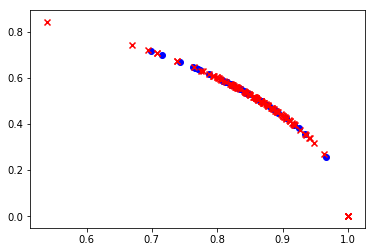

In [104]:
pos = where(final_ypred == 1)
neg = where(final_ypred == 0)
        
plt.scatter(my_X_test[np.asarray(pos), 0], my_X_test[np.asarray(pos), 1], marker='o', c='b')
plt.scatter(my_X_test[np.asarray(neg), 0], my_X_test[np.asarray(neg), 1], marker='x', c='r')

